In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time

In [4]:
rg="595"
reg='\\595r'

In [5]:
T=7070#K Table 5

https://iopscience.iop.org/article/10.1088/0004-637X/700/1/654

In [6]:
RA=23.390942#J2000
Dec=30.691559#J200

https://ned.ipac.caltech.edu/byname?objname=NGC%20595&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [7]:
inputfile=dict()
inputfile[0]='Obs\ISIS.595.Red.txt'

Arm Data

In [8]:
#Ha,[NII],[SII]

LineN=['H$_{α}$ 6563','[NII]λ6548','[NII]λ6584','[SII]λ6717','[SII]λ6731']
LineM=['Ha6563','NII6548','NII6584','SII6717','SII6731']
LineD=['H','Nx','N','Sx','S']

line=['Ha','Nb','Na','Sb','Sa']
l=[6562.8,6548,6584,6717,6731]#AngstromsR
SI=[18,12,12,15,15]#km/s
XW=[1.00794,14.0067,14.0067,32.065,32.065]
color=['green','orange','orange','red','red']

#Hb,[OIII]

#LineN=['H$_{β}$ 4861','[OIII]λ4959','[OIII]λ5007']
#line=['Hb','Ob','O4']
#l=[4861.36,4958.9,5006.9]#AngstromsB
#SI=[18,19,19]#km/s
#XW=[1.00794,15.9994,15.9994]
#color=['purple','blue','blue']


n=len(l)

In [9]:
Data=pd.read_table(inputfile[0])
Data=Data.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})


In [10]:
Data

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1.0,199.809,22.0,1.0,595r1_878-001004.xlsx,6562.267,0.211,-4.288,0.464,-31.70,...,8.525,7.594,6726.756,0.296,1.419,0.544,13.700,5.127,20.690,7.479
1,2.0,198.468,22.0,1.0,595r1_878-005008.xlsx,6557.690,0.228,0.882,0.404,16.36,...,18.900,6.029,6725.364,0.150,0.913,0.297,-1.937,4.781,-1.883,-4.577
2,3.0,197.127,22.0,1.0,595r1_878-009012.xlsx,6557.705,0.108,0.970,0.262,35.66,...,7.970,9.081,6724.843,0.551,2.664,1.016,8.852,3.333,25.110,9.367
3,4.0,195.786,22.0,1.0,595r1_878-013016.xlsx,6557.593,0.083,0.916,0.202,41.62,...,17.990,8.705,6725.727,0.605,2.698,1.057,3.842,2.687,11.030,8.172
4,5.0,194.445,22.0,1.0,595r1_878-017020.xlsx,6557.546,0.082,0.813,0.195,40.74,...,-14.250,-5.156,6724.045,0.154,0.948,0.355,-8.792,4.558,-8.870,-5.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Data.columns

Index(['Pos', 'X', 'Y', 'Slit', 'Archivo', 'Center.0', 'ErrC.0', 'Width.0',
       'ErrW.0', 'Peak.0', 'ErrP.0', 'Line', 'ErrL', 'Center.1', 'ErrC.1',
       'Width.1', 'ErrW.1', 'Peak.1', 'ErrP.1', 'Line.1', 'ErrL.1', 'Center.2',
       'ErrC.2', 'Width.2', 'ErrW.2', 'Peak.2', 'ErrP.2', 'Line.2', 'ErrL.2',
       'Center.3', 'ErrC.3', 'Width.3', 'ErrW.3', 'Peak.3', 'ErrP.3', 'Line.3',
       'ErrL.3', 'Center.4', 'ErrC.4', 'Width.4', 'ErrW.4', 'Peak.4', 'ErrP.4',
       'Line.4', 'ErrL.4'],
      dtype='object')

In [12]:
sz=3
wd=Data.X.max()-Data.X.min()
hd=Data.Y.max()-Data.Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


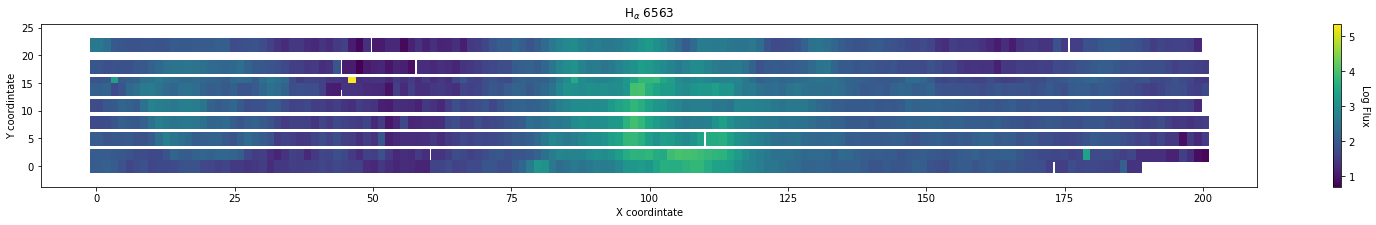

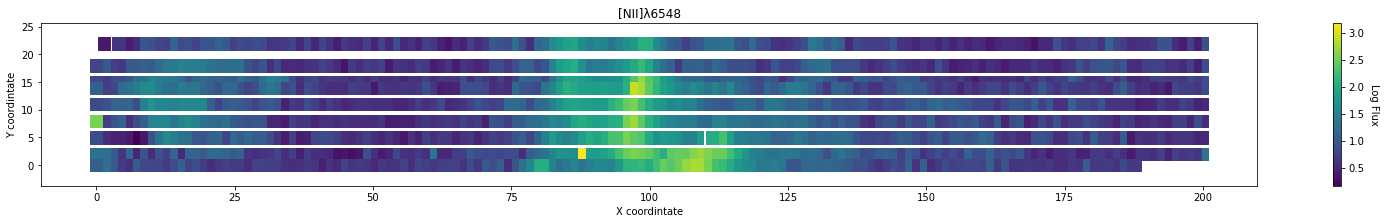

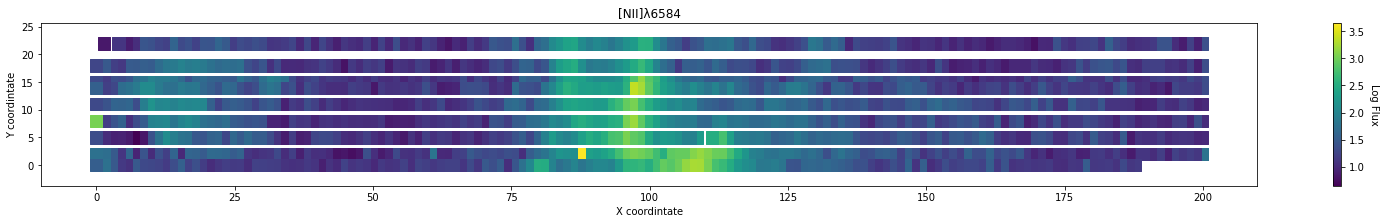

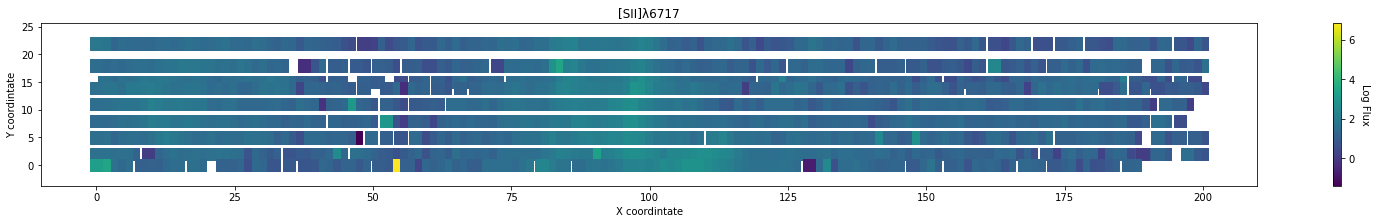

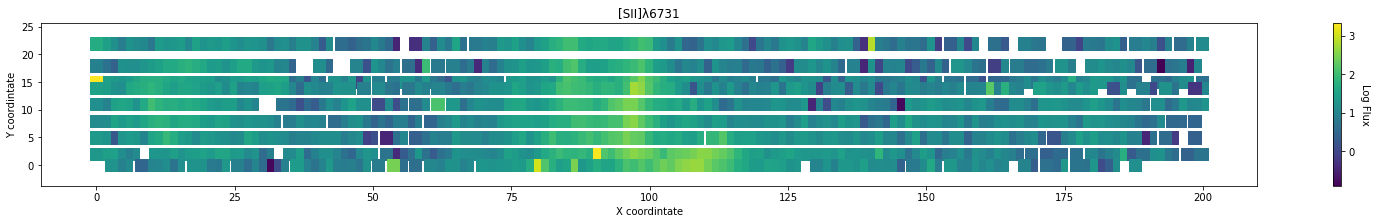

In [13]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    #fig, ax = plt.subplots(figsize=(15, 5))
    plt.scatter(Data.X,Data.Y,c=np.log10(Data['Peak.'+str(i)]), s=150,marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)  
    
    plt.savefig(rg+reg+'\Imgs\ISIS\ '+LineM[i]+'.png')

Mask 01: X corrdinate filter

Type A sample: SABRE

In [14]:
m01=(Data.X>75)&(Data.X<125)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

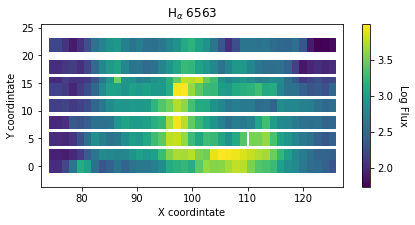

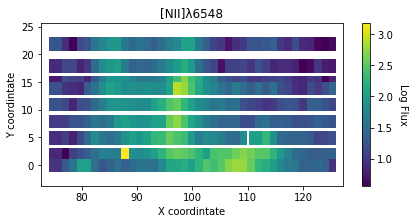

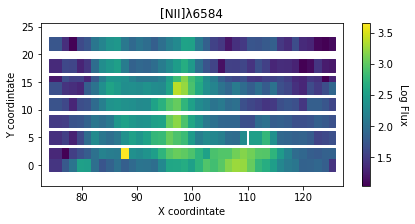

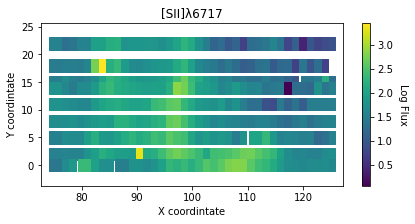

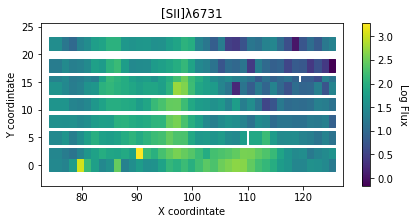

In [15]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(Data01.X,Data01.Y,c=np.log10(Data01['Peak.'+str(i)]), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)

    plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

Tables individual lines

In [16]:
argo=dict()

for i in range(n):
    data=[Data01['X'],Data01['Y'],Data01['Center.'+str(i)],Data01['Peak.'+str(i)],Data01['Width.'+str(i)]]
    headers=["X","Y","Center","Peak","Width"]

    argo[i]=pd.concat(data,axis=1,keys=headers)
    

RadialVelocity

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + CorrHel $$

In [17]:
orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s)

<Quantity 25.90390484 km / s>

In [18]:
#Iraf
corrhelio=np.array(heliocorr.to(u.km/u.s))

#Constant
c=299792.459#km/s

for i in range(n):
    RVo=c*(argo[i].Center-l[i])/l[i]
    RV=RVo+corrhelio

    argo[i]=argo[i].assign(RV=RV.values)

Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{therm}^{2}-\sigma_{inst}^{2}$$

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{Xw}$$

In [19]:
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#Constant
c=299792.459#km/s

In [20]:
SigmaObs=dict()

for i in range(n):
    #SigmaObs
    a=0.6006/1.414
    SigmaObs[i]=a*(argo[i].Width/l[i])*c
    
    #SigmaTerm
    b=166.6/1.414
    SigmaTerm=np.sqrt(b*(T/10000)/XW[i])

    SigmaDisp=np.sqrt(SigmaObs[i]**2-SigmaTerm**2-SI[i]**2)

    argo[i]=argo[i].assign(Sig=SigmaDisp.values)

    print(SigmaTerm)

9.090863994317829
2.4386787123523037
2.4386787123523037
1.611784142186605
1.611784142186605


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
for i in range(n):
    print(argo[i].describe())    

                X           Y       Center         Peak       Width  \
count  342.000000  342.000000   342.000000   342.000000  342.000000   
mean    99.904500   10.555556  6538.539301  1266.556696    0.975997   
std     14.726759    7.004072   354.600673  1791.295646    0.561617   
min     75.096000    0.000000     0.000000     0.000000   -0.948000   
25%     87.165000    5.000000  6557.556250   306.225000    0.931000   
50%     99.904500   11.000000  6557.730000   595.250000    1.023000   
75%    112.644000   15.000000  6557.930000  1263.250000    1.182750   
max    124.713000   22.000000  6558.262000  9957.000000    2.665000   

                  RV         Sig  
count     342.000000  156.000000  
mean    -1082.338699   13.493667  
std     16198.361637    7.872394  
min   -299766.555095    1.154918  
25%      -213.633595    7.700620  
50%      -205.696596   11.908853  
75%      -196.560482   18.301259  
max      -181.394532   47.614690  
                X           Y       Center   

A Sample

In [22]:
mrv=(argo[0].RV>-500)


<ipython-input-23-f4b269935000>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(argo[i][mrv].X,argo[i][mrv].Y,c=np.log(argo[i][mrv]).Peak, s=150, marker='s')
<ipython-input-23-f4b269935000>:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(argo[i][mrv].X,argo[i][mrv].Y,c=np.log(argo[i][mrv]).Peak, s=150, marker='s')


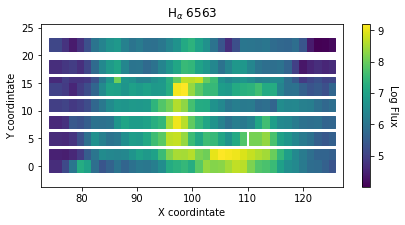

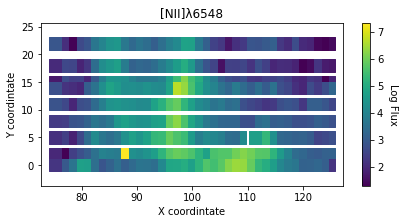

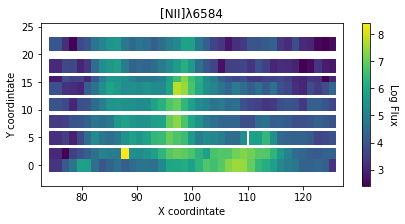

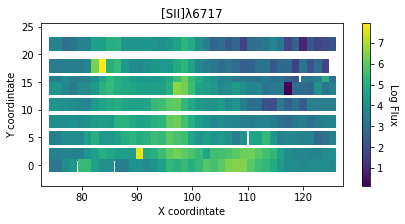

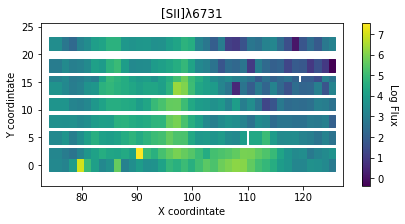

In [23]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][mrv].X,argo[i][mrv].Y,c=np.log(argo[i][mrv]).Peak, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

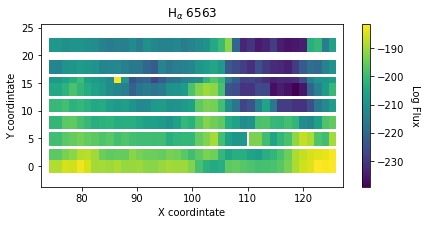

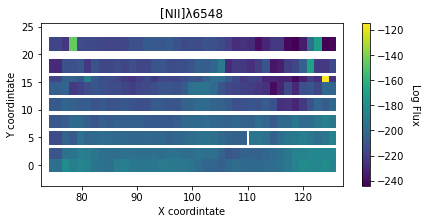

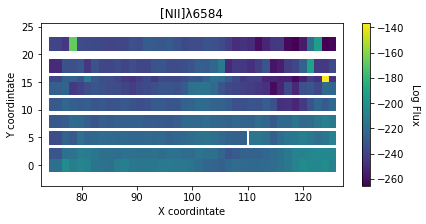

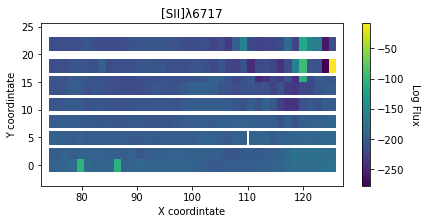

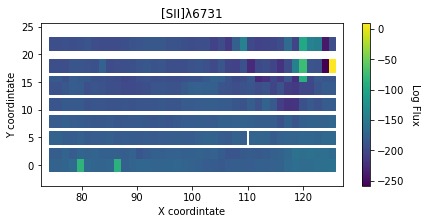

In [24]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][mrv].X,argo[i][mrv].Y,c=argo[i][mrv].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\RV'+LineM[i]+'.png')

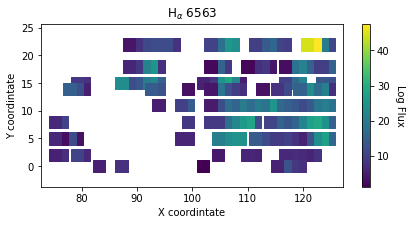

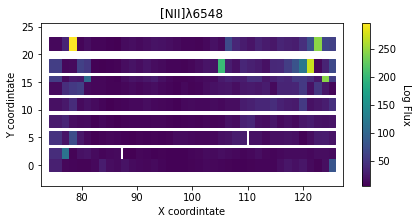

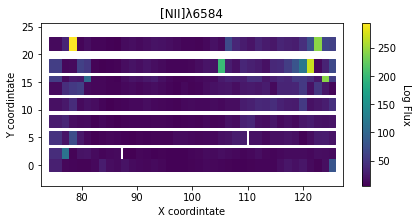

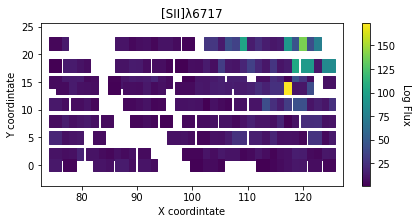

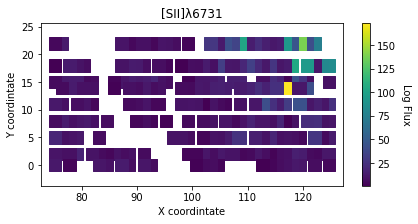

In [25]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][mrv].X,argo[i][mrv].Y,c=argo[i][mrv].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\S'+LineM[i]+'.png')

In [26]:
for i in range(n):
    print(argo[i][mrv].describe())    

                X           Y       Center         Peak       Width  \
count  341.000000  341.000000   341.000000   341.000000  341.000000   
mean    99.875006   10.571848  6557.713903  1270.270938    0.978859   
std     14.738281    7.007872     0.288293  1792.608599    0.559938   
min     75.096000    0.000000  6557.000000    54.730000   -0.948000   
25%     87.165000    5.000000  6557.557000   308.100000    0.931000   
50%     99.234000   11.000000  6557.734000   598.000000    1.023000   
75%    112.644000   15.000000  6557.931000  1264.000000    1.187000   
max    124.713000   22.000000  6558.262000  9957.000000    2.665000   

               RV         Sig  
count  341.000000  156.000000  
mean  -206.431906   13.493667  
std     13.169376    7.872394  
min   -239.043414    1.154918  
25%   -213.599335    7.700620  
50%   -205.513874   11.908853  
75%   -196.514801   18.301259  
max   -181.394532   47.614690  
                X           Y       Center         Peak       Width  \
c

B sample

In [27]:
rv1=-225
rv2=-175
m01=(argo[0].RV>rv1)&(argo[0].RV<rv2)&(argo[1].RV>rv1)&(argo[1].RV<rv2)&(argo[3].RV>rv1)&(argo[3].RV<rv2)


In [28]:

sz=3
wd=argo[i][m01].X.max()-argo[i][m01].X.min()
hd=argo[i][m01].Y.max()-argo[i][m01].Y.min()
ar=wd/hd

<ipython-input-29-48a949dcbd18>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(argo[i][m01].X,argo[i][m01].Y,c=np.log(argo[i][m01]).Peak, s=150, marker='s')
<ipython-input-29-48a949dcbd18>:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(argo[i][m01].X,argo[i][m01].Y,c=np.log(argo[i][m01]).Peak, s=150, marker='s')


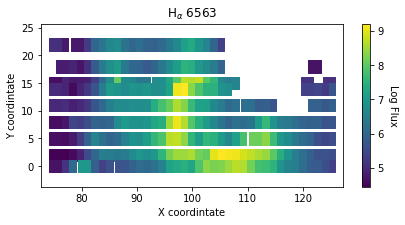

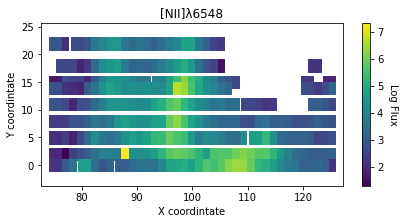

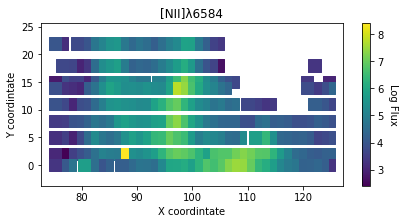

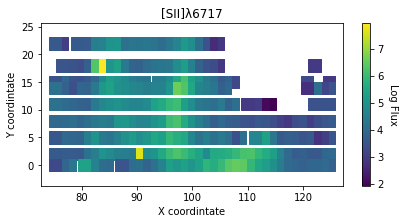

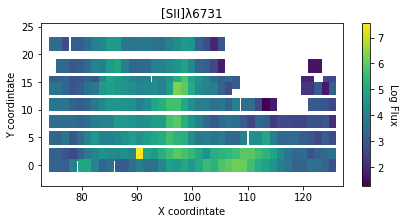

In [29]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m01].X,argo[i][m01].Y,c=np.log(argo[i][m01]).Peak, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

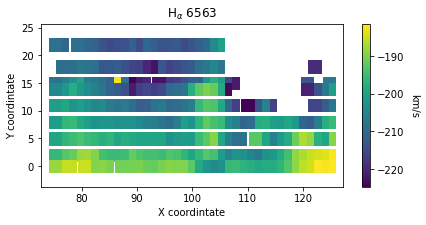

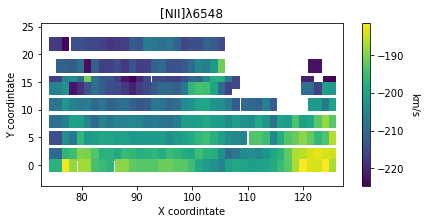

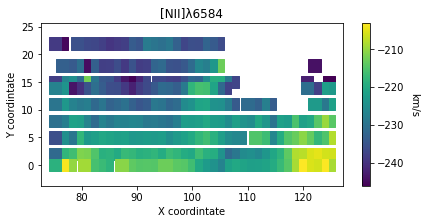

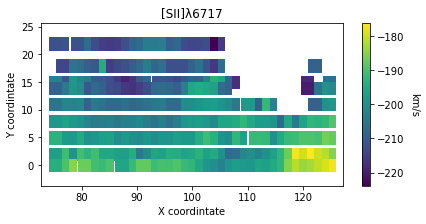

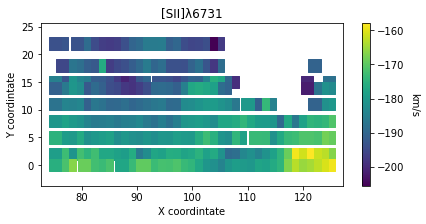

In [30]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m01].X,argo[i][m01].Y,c=argo[i][m01].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\RV'+LineM[i]+'.png')

In [31]:
for i in range(n):
    print(argo[i][m01].describe())    

                X           Y       Center         Peak       Width  \
count  280.000000  280.000000   280.000000   280.000000  280.000000   
mean    97.165029    9.275000  6557.800064  1438.066821    0.936471   
std     14.129335    6.755278     0.209339  1928.814645    0.577132   
min     75.096000    0.000000  6557.314000    85.360000   -0.948000   
25%     85.824000    2.000000  6557.643750   352.475000    0.920500   
50%     96.552000    8.000000  6557.808500   695.950000    1.010000   
75%    107.280000   15.000000  6557.952500  1520.500000    1.141000   
max    124.713000   22.000000  6558.262000  9957.000000    1.823000   

               RV         Sig  
count  280.000000  116.000000  
mean  -202.496019   13.095985  
std      9.562705    7.235521  
min   -224.699714    1.154918  
25%   -209.636545    7.424321  
50%   -202.110671   11.851549  
75%   -195.532669   18.337133  
max   -181.394532   29.060332  
                X           Y       Center         Peak       Width  \
c

C sample

In [32]:
argom01=dict()

for i in range(n):
    m02=(argo[i].X>88)&(argo[i].X<120)&(argo[0].RV>-230)&(argo[0].Peak>850)
    argom01[i]=argo[i][m02]

sz=3
wd=argom01[0].X.max()-argom01[0].X.min()
hd=argom01[0].Y.max()-argom01[0].Y.min()
ar=wd/hd

<ipython-input-33-bab61b3d50bc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(argom01[i][m01],


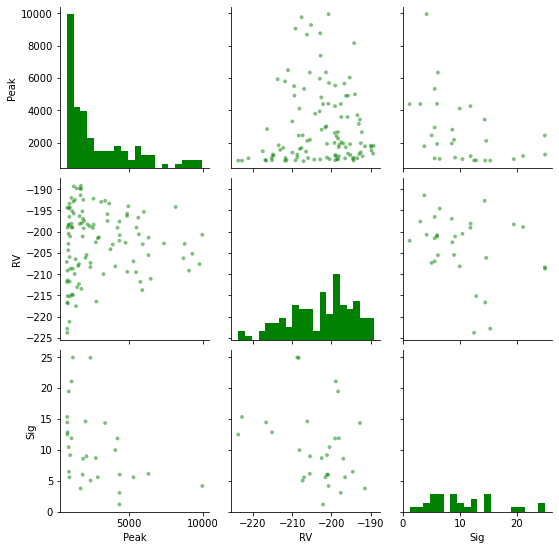

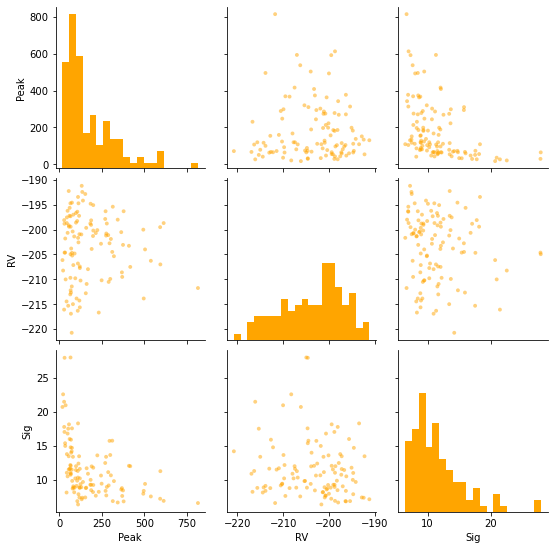

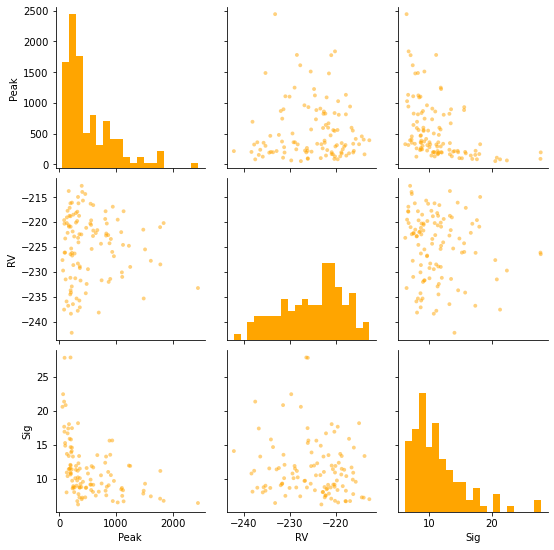

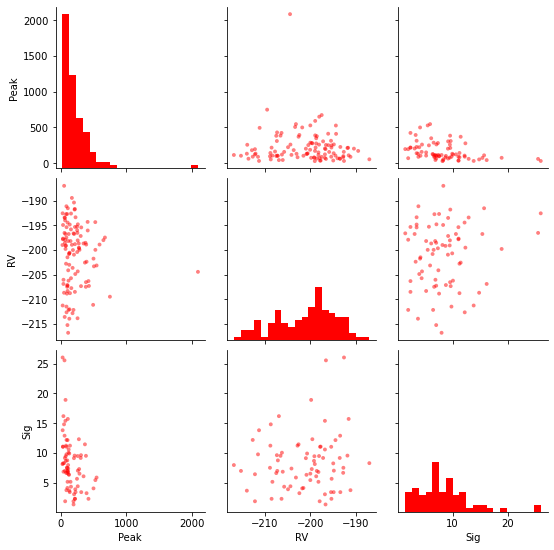

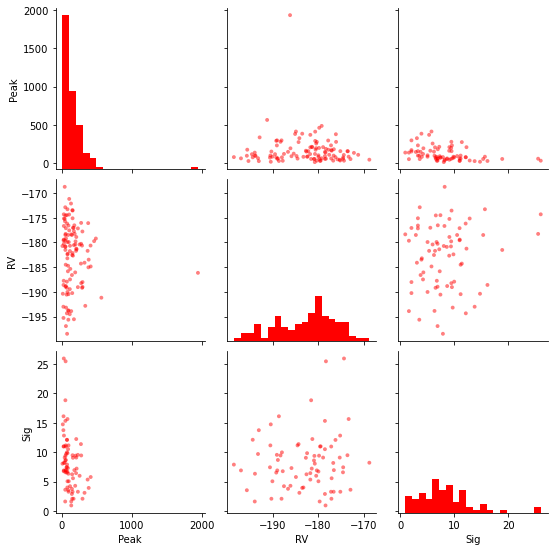

In [33]:
for i in range(n):

    sns.pairplot(argom01[i][m01],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )


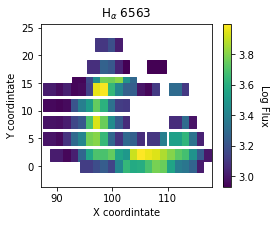

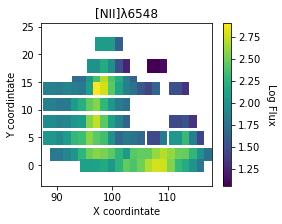

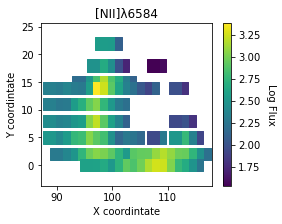

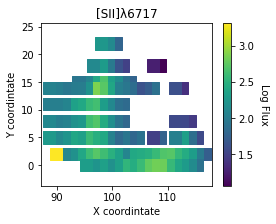

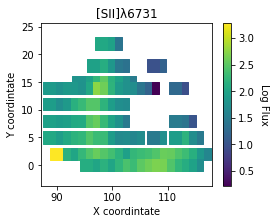

In [34]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=np.log10(argom01[i].Peak), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\F'+LineM[i]+'.png')

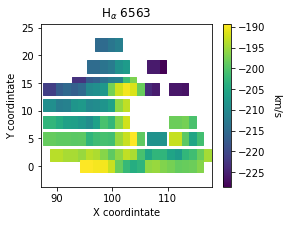

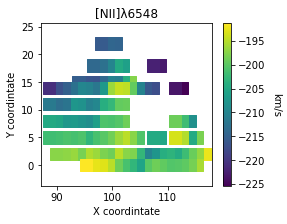

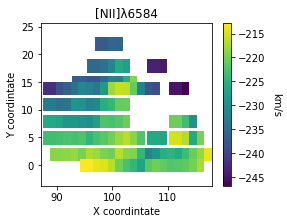

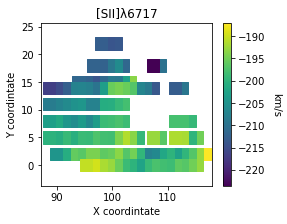

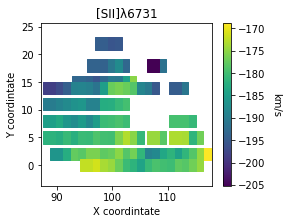

In [35]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=argom01[i].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\RV'+LineM[i]+'.png')

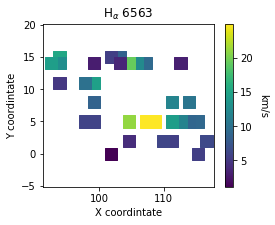

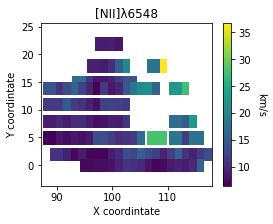

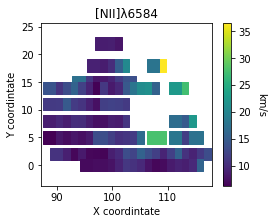

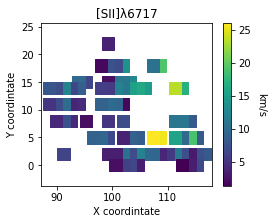

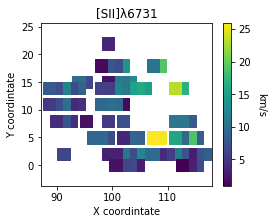

In [36]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=argom01[i].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\S'+LineM[i]+'.png')

In [37]:
for i in range(n):
    print(argom01[i].describe())    

                X           Y       Center         Peak       Width  \
count  116.000000  116.000000   116.000000   116.000000  116.000000   
mean   100.864009    7.931034  6557.773828  2881.891379    0.860741   
std      7.454437    6.144243     0.202879  2304.798298    0.557150   
min     88.506000    0.000000  6557.230000   854.800000   -0.948000   
25%     95.211000    2.000000  6557.652500  1163.500000    0.903500   
50%     99.904500    8.000000  6557.814500  1882.000000    0.991000   
75%    106.274250   14.000000  6557.928000  4147.750000    1.054000   
max    116.667000   22.000000  6558.091000  9957.000000    1.653000   

               RV        Sig  
count  116.000000  32.000000  
mean  -203.694527  10.143038  
std      9.267648   6.119401  
min   -228.536882   1.154918  
25%   -209.236840   5.554325  
50%   -201.836588   9.041915  
75%   -196.651843  13.210033  
max   -189.205909  24.940668  
                X           Y       Center        Peak       Width  \
count  116.

 $\sigma_{disp}$ vs I (a.k.a. Peak)

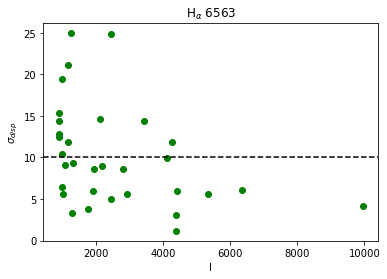

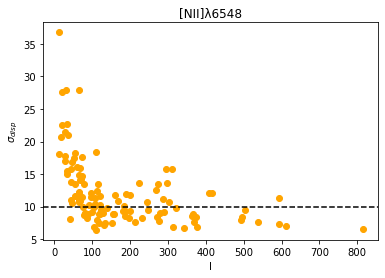

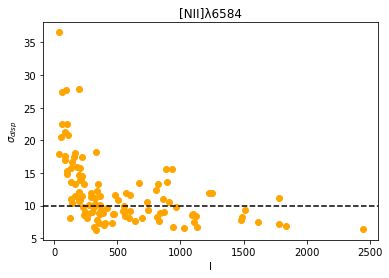

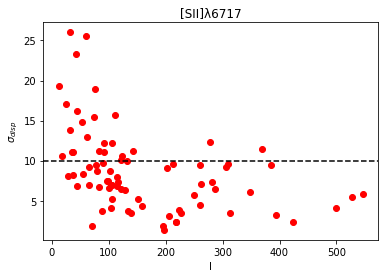

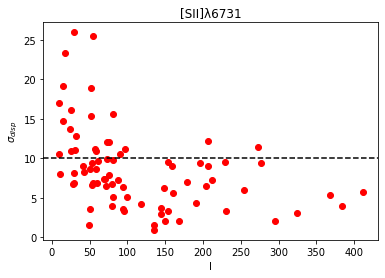

In [38]:
for i in range(n):
    fig, ax = plt.subplots()
    plt.scatter(argom01[i].Peak,argom01[i].Sig,color=color[i])
    plt.title(LineN[i])
    plt.axhline(y=10, color='k', linestyle='--')
    ax.set_xlabel('I')
    ax.set_ylabel('$σ_{disp}$')
    plt.savefig(rg+reg+'\Imgs\SvsI\SI'+LineM[i]+'.png')

Ratios

In [39]:

sz=3
wd=argo[0].X.max()-argo[0].X.min()
hd=argo[0].Y.max()-argo[0].Y.min()
ar=wd/hd

[NII]/Ha Ratio

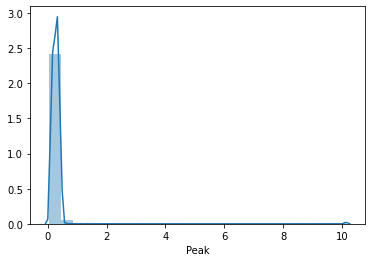

In [40]:
NHRatio=(argo[1].Peak+argo[2].Peak)/argo[0].Peak
sns.distplot(NHRatio,bins=25)

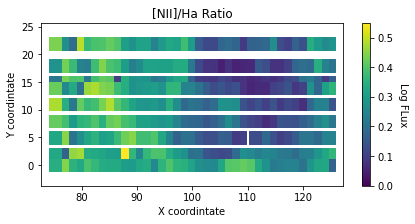

In [41]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=NHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[NII]/Ha Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(0,0.55)

plt.savefig(rg+reg+'\Imgs\RD\RH'+LineM[i]+'.png')

[SII]/Ha Ratio

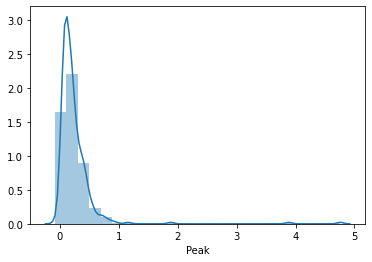

In [42]:
SHRatio=(argo[3].Peak+argo[4].Peak)/argo[0].Peak
sns.distplot(SHRatio,bins=25)

In [43]:
m04=(SHRatio>0)&(SHRatio<0.4)

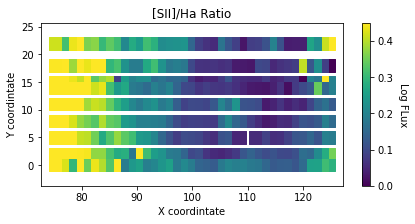

In [44]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=SHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[SII]/Ha Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(0,0.45)  

plt.savefig(rg+reg+'\Imgs\RD\SH'+LineM[i]+'.png')

Density

In [45]:
def eden(R):
    """Approximate sii electron density from R=6717/6731"""
    RR = 1.0/R
    return 2489*(RR - 0.6971) / (2.3380 - RR)

In [46]:
DenS=eden((argo[4].Peak/argo[4].Peak.max())/(argo[3].Peak/argo[3].Peak.max()))

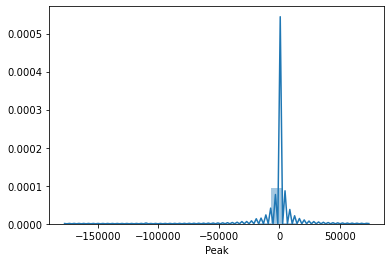

In [47]:
sns.distplot(DenS,bins=25)

In [48]:
m05=(DenS>0)&(DenS<1000)

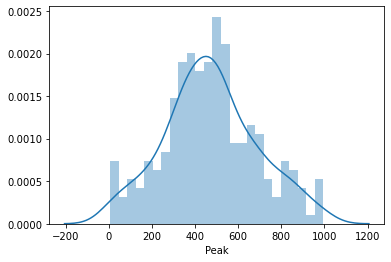

In [49]:
sns.distplot(DenS[m05],bins=25)

In [50]:
DenS[m05].describe()

count    239.000000
mean     471.767721
std      215.283750
min        5.461115
25%      336.734018
50%      462.920197
75%      605.230574
max      994.645208
Name: Peak, dtype: float64

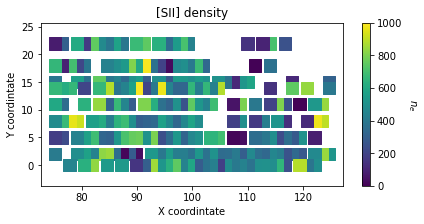

In [51]:

fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.scatter(argo[4][m05].X,argo[4][m05].Y,c=DenS[m05], s=150, marker='s')
plt.axis('equal')
plt.title('[SII] density')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('$n_e$', rotation=270, labelpad=15)
plt.clim(0,1000)  

plt.savefig(rg+reg+'\Imgs\RD\Dens'+LineM[i]+'.png')

Effective Layer thickness

In [52]:
EFL=(argo[0].Peak/argo[0].Peak.max())/DenS**2

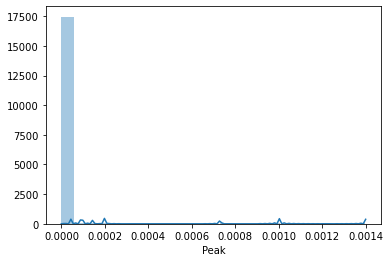

In [53]:
sns.distplot(EFL,bins=25)

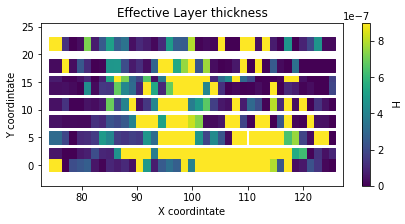

In [54]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.scatter(argo[0].X,argo[0].Y,c=EFL, s=150, marker='s')
plt.axis('equal')
plt.title('Effective Layer thickness')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('H', rotation=270, labelpad=15)
plt.clim(0,0.0000009)  

plt.savefig(rg+reg+'\Imgs\RD\EFL'+LineM[i]+'.png')

Export Samples for statistical analysis

In [55]:
#argo[0][mrv].to_csv(rg+reg+'\Data\ISIS\A\ '+LineM[0]+'.csv')

In [56]:
argo[0][mrv].to_csv('Res\ 595I'+LineD[0]+'A.csv')

In [57]:
#for i in range(n):
#    argo[i][m01].to_csv(rg+reg+'\Data\ISIS\B\ '+LineM[i]+'.csv')

In [58]:
for i in range(n):
   argo[i][m01].to_csv('Res\ 595I'+LineD[i]+'B.csv')

In [59]:
#for i in range(n):
#    argom01[i].to_csv(rg+reg+'\Data\ISIS\C\ '+LineM[i]+'.csv')

In [60]:
for i in range(n):
    argom01[i].to_csv('Res\ 595I'+LineD[i]+'C.csv')

In [61]:
#datap='dataI6583.csv'
#dt=pd.read_csv(datap)
#dt=dt.rename(columns={'Unnamed: 0':'No'})
#dt=dt.drop('No',axis=1)
#os.remove(datap)
#dt.describe()

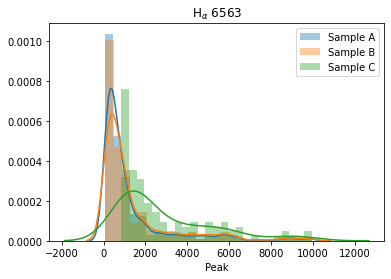

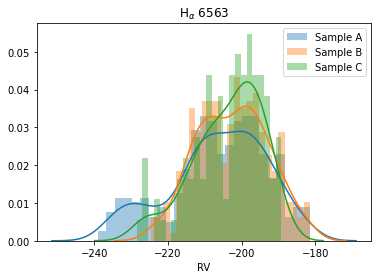

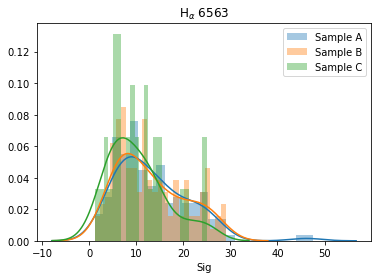

In [62]:
for i in range(1):

    fig, ax = plt.subplots()
    sns.distplot(argo[i][mrv].Peak,bins=25,label='Sample A')
    sns.distplot(argo[i][m01].Peak,bins=25,label='Sample B')
    sns.distplot(argom01[i].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][mrv].RV,bins=25,label='Sample A')
    sns.distplot(argo[i][m01].RV,bins=25,label='Sample B')
    sns.distplot(argom01[i].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][mrv].Sig,bins=25,label='Sample A')
    sns.distplot(argo[i][m01].Sig,bins=25,label='Sample B')
    sns.distplot(argom01[i].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')

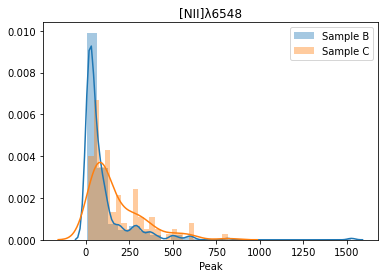

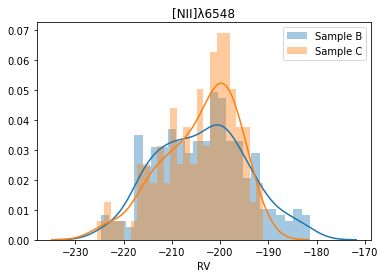

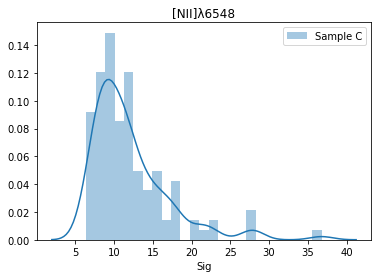

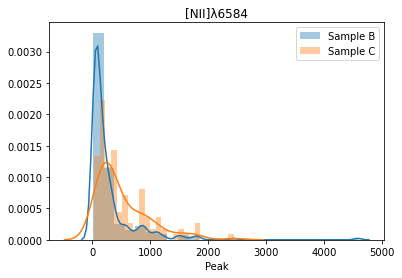

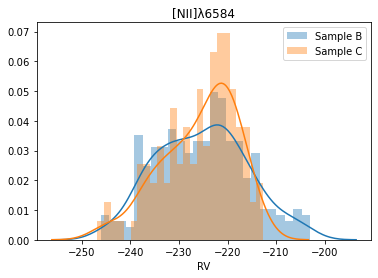

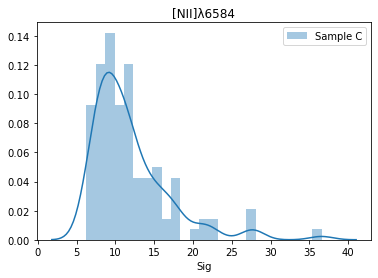

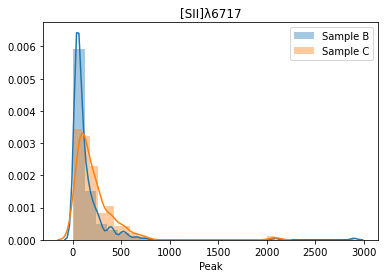

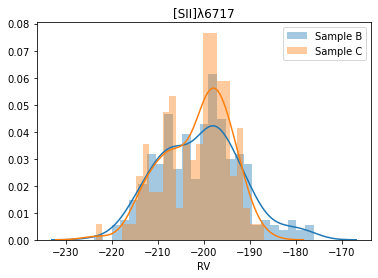

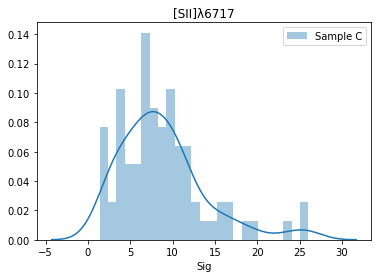

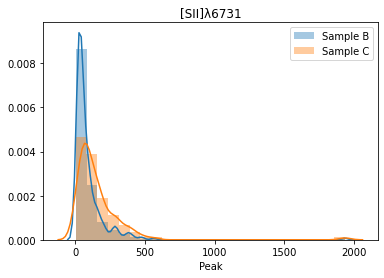

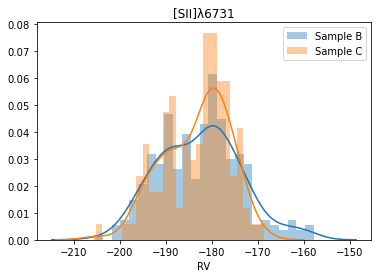

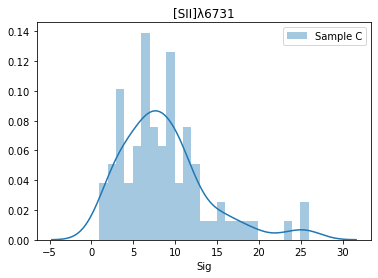

In [63]:
for i in range(1,n,1):

    fig, ax = plt.subplots()

    sns.distplot(argo[i][m01].Peak,bins=25,label='Sample B')
    sns.distplot(argom01[i].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][m01].RV,bins=25,label='Sample B')
    sns.distplot(argom01[i].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    #sns.distplot(argo[i][m01].Sig,bins=25,label='Sample B')
    sns.distplot(argom01[i].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')


In [64]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 36.574798345565796 seconds ---
